In [1]:
import pandas as pd

TrainData = pd.read_csv("Desktop/weatherTest.csv")
print (TrainData.columns)

TrainData = TrainData[['Formatted Date','Precip Type', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]

print("Top 5 rows")
print (TrainData.head())
print ()
print("Bottom 5 rows")
print (TrainData.tail())

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
Top 5 rows
                  Formatted Date Precip Type  Temperature (C)  Humidity  \
0  2006-04-01 00:00:00.000 +0200        rain         9.472222      0.89   
1  2006-04-01 01:00:00.000 +0200        rain         9.355556      0.86   
2  2006-04-01 02:00:00.000 +0200        rain         9.377778      0.89   
3  2006-04-01 03:00:00.000 +0200        rain         8.288889      0.83   
4  2006-04-01 04:00:00.000 +0200        rain         8.755556      0.83   

   Wind Speed (km/h)  Wind Bearing (degrees)  Pressure (millibars)  
0            14.1197                   251.0               1015.13  
1            14.2646                   259.0               1015.63  
2             3.9284                   204.0            

In [2]:
print (TrainData.dtypes)

Formatted Date             object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Pressure (millibars)      float64
dtype: object


In [3]:
print (TrainData.describe())

       Temperature (C)      Humidity  Wind Speed (km/h)  \
count     96453.000000  96453.000000       96453.000000   
mean         11.932678      0.734899          10.810640   
std           9.551546      0.195473           6.913571   
min         -21.822222      0.000000           0.000000   
25%           4.688889      0.600000           5.828200   
50%          12.000000      0.780000           9.965900   
75%          18.838889      0.890000          14.135800   
max          39.905556      1.000000          63.852600   

       Wind Bearing (degrees)  Pressure (millibars)  
count            96453.000000          96453.000000  
mean               187.509232           1003.235956  
std                107.383428            116.969906  
min                  0.000000              0.000000  
25%                116.000000           1011.900000  
50%                180.000000           1016.450000  
75%                290.000000           1021.090000  
max                359.000000       

In [4]:
print (TrainData.corr())

                        Temperature (C)  Humidity  Wind Speed (km/h)  \
Temperature (C)                1.000000 -0.632255           0.008957   
Humidity                      -0.632255  1.000000          -0.224951   
Wind Speed (km/h)              0.008957 -0.224951           1.000000   
Wind Bearing (degrees)         0.029988  0.000735           0.103822   
Pressure (millibars)          -0.005447  0.005454          -0.049263   

                        Wind Bearing (degrees)  Pressure (millibars)  
Temperature (C)                       0.029988             -0.005447  
Humidity                              0.000735              0.005454  
Wind Speed (km/h)                     0.103822             -0.049263  
Wind Bearing (degrees)                1.000000             -0.011651  
Pressure (millibars)                 -0.011651              1.000000  


In [5]:
# Data Wrangling

# Step 1 - Missing values 

# Method 1 :- filling by mean
import numpy as np

TrainData['Temperature (C)'].replace(np.nan, TrainData['Temperature (C)'].mean())
TrainData['Humidity'].replace(np.nan, TrainData['Humidity'].mean())
TrainData['Wind Speed (km/h)'].replace(np.nan, TrainData['Wind Speed (km/h)'].mean())
TrainData['Wind Bearing (degrees)'].replace(np.nan, TrainData['Wind Bearing (degrees)'].mean())
TrainData['Pressure (millibars)'].replace(np.nan, TrainData['Pressure (millibars)'].mean()) 

# Method 2 :- Drop rows with missing values

# TrainData.dropna(subset = ['Temperature (C)'], axis = 0, inplace = True


0        1015.13
1        1015.63
2        1015.94
3        1016.41
4        1016.51
          ...   
96448    1014.36
96449    1015.16
96450    1015.66
96451    1015.95
96452    1016.16
Name: Pressure (millibars), Length: 96453, dtype: float64

In [29]:
# Standards units

# Normalization Techniques

# Method 1 - scaling everything from 0 to 1 

print(TrainData[['Humidity','Wind Speed (km/h)']])

TrainData['Humidity'] = TrainData['Humidity']/TrainData['Humidity'].max()
TrainData['Wind Speed (km/h)'] = TrainData['Wind Speed (km/h)']/TrainData['Wind Speed (km/h)'].max()




# Method 2 - Min-Max
#TrainData['Humidity'] = (TrainData['Humidity'] - TrainData['Humidity'].min())/(TrainData['Humidity'].max() - TrainData['Humidity'].min())
#TrainData['Wind Speed (km/h)'] = (TrainData['Wind Speed (km/h)'] - TrainData['Wind Speed (km/h)'].min())/(TrainData['Wind Speed (km/h)'].max() - TrainData['Wind Speed (km/h)'].min())


# Method 3 - ZScore

#TrainData['Humidity'] = (TrainData['Humidity'] - TrainData['Humidity'].mean())/(TrainData['Humidity'].std())
#TrainData['Wind Speed (km/h)'] = (TrainData['Wind Speed (km/h)'] - TrainData['Wind Speed (km/h)'].mean())/(TrainData['Wind Speed (km/h)'].std())



print(TrainData[['Humidity','Wind Speed (km/h)']])


       Humidity  Wind Speed (km/h)
0      0.793466           0.478633
1      0.639992           0.499591
2      0.793466          -0.995468
3      0.486518           0.476304
4      0.486518           0.033841
...         ...                ...
96448 -1.559803           0.026854
96449 -1.304013          -0.103556
96450 -0.894749          -0.264240
96451 -0.690117          -0.040679
96452 -0.638958          -0.713689

[96453 rows x 2 columns]
       Humidity  Wind Speed (km/h)
0      0.585064           0.062386
1      0.471899           0.065118
2      0.585064          -0.129751
3      0.358735           0.062082
4      0.358735           0.004411
...         ...                ...
96448 -1.150124           0.003500
96449 -0.961516          -0.013498
96450 -0.659745          -0.034441
96451 -0.508859          -0.005302
96452 -0.471137          -0.093023

[96453 rows x 2 columns]


In [49]:
# Data Bining
#print (TrainData.columns)

# Category data trial


pd.get_dummies(TrainData['Precip Type'])

#print (TrainData.loc[TrainData['Precip Type'] == 'snow'])

#Check count of categories

# Method 1 - using value_count

print (TrainData['Precip Type'].value_counts())

# Method 2 - groupby
#print (TrainData.groupby('Precip Type').agg(['count', 'sum']))

rain    85224
snow    10712
Name: Precip Type, dtype: int64
            Formatted Date                                                     \
                     count                                                sum   
Precip Type                                                                     
rain                 85224  2006-04-01 00:00:00.000 +02002006-04-01 01:00:...   
snow                 10712  2006-12-13 02:00:00.000 +01002006-12-13 03:00:...   

            Temperature (C)               Humidity               \
                      count           sum    count          sum   
Precip Type                                                       
rain                  85224  1.180607e+06    85224 -5207.823930   
snow                  10712 -3.503772e+04    10712  5186.823505   

            Wind Speed (km/h)             Wind Bearing (degrees)              \
                        count         sum                  count         sum   
Precip Type                           

In [54]:
# Box Plot

#import seaborn as sns

#sns.boxplot(x="Temperature (C)", y="Humidity", data=TrainData)


df_group = TrainData.groupby(['Precip Type'],as_index=False).mean()
print (df_group)

  Precip Type  Temperature (C)  Humidity  Wind Speed (km/h)  \
0        rain        13.852989 -0.061107           0.003027   
1        snow        -3.270885  0.484207          -0.025049   

   Wind Bearing (degrees)  Pressure (millibars)         year     month  \
0              189.123170           1002.764548  2011.028595  6.690451   
1              174.754294           1006.216970  2010.587192  5.093727   

         day       hour  
0  15.667570  11.623651  
1  15.970314  10.497573  


In [69]:
# AnoVA - Analysis of variance -> Calculate FScore and PValue

# between rain and temperature

from scipy import stats 

df_anova = TrainData[['Precip Type','Temperature (C)']]

grouped_anova = df_anova.groupby(['Precip Type'])

stats.f_oneway(grouped_anova.get_group('rain')['Temperature (C)'],grouped_anova.get_group('snow')['Temperature (C)'])

F, p = stats.f_oneway(grouped_anova['Temperature (C)'], grouped_anova['Precip Type'])

ValueError: could not convert string to float: 'rain'

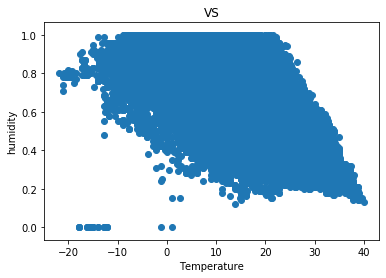

In [6]:

import matplotlib.pyplot as plt

x = TrainData['Temperature (C)']
y = TrainData['Humidity']

plt.scatter(x,y)
plt.title('VS')
plt.xlabel('Temperature')
plt.ylabel('humidity')
plt.show()

In [7]:
quantitative = TrainData.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Pressure (millibars)'],
      dtype='object')


In [8]:
data = TrainData
print(data)

                      Formatted Date Precip Type  Temperature (C)  Humidity  \
0      2006-04-01 00:00:00.000 +0200        rain         9.472222      0.89   
1      2006-04-01 01:00:00.000 +0200        rain         9.355556      0.86   
2      2006-04-01 02:00:00.000 +0200        rain         9.377778      0.89   
3      2006-04-01 03:00:00.000 +0200        rain         8.288889      0.83   
4      2006-04-01 04:00:00.000 +0200        rain         8.755556      0.83   
...                              ...         ...              ...       ...   
96448  2016-09-09 19:00:00.000 +0200        rain        26.016667      0.43   
96449  2016-09-09 20:00:00.000 +0200        rain        24.583333      0.48   
96450  2016-09-09 21:00:00.000 +0200        rain        22.038889      0.56   
96451  2016-09-09 22:00:00.000 +0200        rain        21.522222      0.60   
96452  2016-09-09 23:00:00.000 +0200        rain        20.438889      0.61   

       Wind Speed (km/h)  Wind Bearing (degrees)  P

In [9]:

import datetime as dt

data['Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour

In [34]:
print (data.head())

                  Formatted Date Precip Type  Temperature (C)  Humidity  \
0  2006-04-01 00:00:00.000 +0200        rain         9.472222      0.89   
1  2006-04-01 01:00:00.000 +0200        rain         9.355556      0.86   
2  2006-04-01 02:00:00.000 +0200        rain         9.377778      0.89   
3  2006-04-01 03:00:00.000 +0200        rain         8.288889      0.83   
4  2006-04-01 04:00:00.000 +0200        rain         8.755556      0.83   

   Wind Speed (km/h)  Wind Bearing (degrees)  Pressure (millibars)  \
0            14.1197                   251.0               1015.13   
1            14.2646                   259.0               1015.63   
2             3.9284                   204.0               1015.94   
3            14.1036                   269.0               1016.41   
4            11.0446                   259.0               1016.51   

                       Date  year  month  day  hour  
0 2006-03-31 22:00:00+00:00  2006      3   31    22  
1 2006-03-31 23:00:0

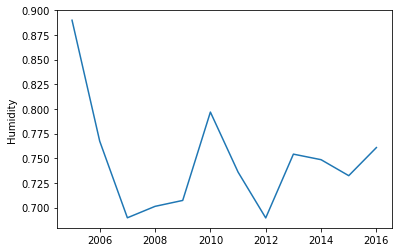

In [10]:
# Average humidity by year

year_humi = data.groupby(data.year).mean()
month_humi = data.groupby(data.month).mean()


#print(year_humi)
plt.plot(year_humi['Humidity'])
plt.ylabel('Humidity')
plt.show()



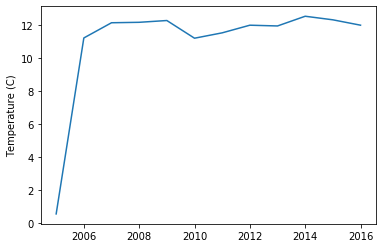

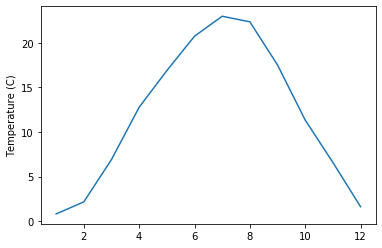

In [56]:
plt.plot(year_humi['Temperature (C)'])
plt.ylabel('Temperature (C)')
plt.show()

plt.plot(month_humi['Temperature (C)'])
plt.ylabel('Temperature (C)')
plt.show()



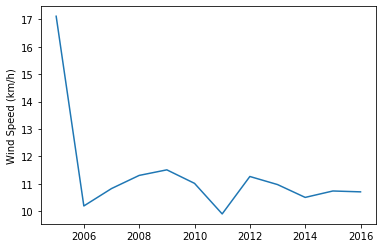

In [48]:
plt.plot(year_humi['Wind Speed (km/h)'])
plt.ylabel('Wind Speed (km/h)')
plt.show()

In [19]:
# Time series for temperature forecast

from sklearn.preprocessing import MinMaxScaler

new_Data = TrainData[['Date','Temperature (C)']]

#new_Data = new_Data.astype('float32')
#print(new_Data)

#scaler= MinMaxScaler(feature_range=(-1,1))

#sc = scaler.fit_transform(data)

In [20]:
print (TrainData.columns)

Index(['Formatted Date', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)',
       'Date', 'year', 'month', 'day', 'hour'],
      dtype='object')
